# **03. 회귀 알고리즘과 모델 규제**

## 02-1 k-최근접 이웃 회귀
- 2장까지의 내용은 양성이면 1, 음성이면 0으로 2가지 중에 하나를 찾는 분류(Classification)
- 지금 해볼 내용은 회귀(regression), 클래스 중 하나로 분류하는 것이 아닌 임의의 숫자 예측하는 것
- 19세기 통계학자 프랜시스 골턴이 키가 큰 사람의 아이가 부모보다 크지 않다는 사실을 보고 '평균으로 회귀한다'라고 표현함
- 회귀: 두 변수 사이의 상관관계를 분석하는 방법

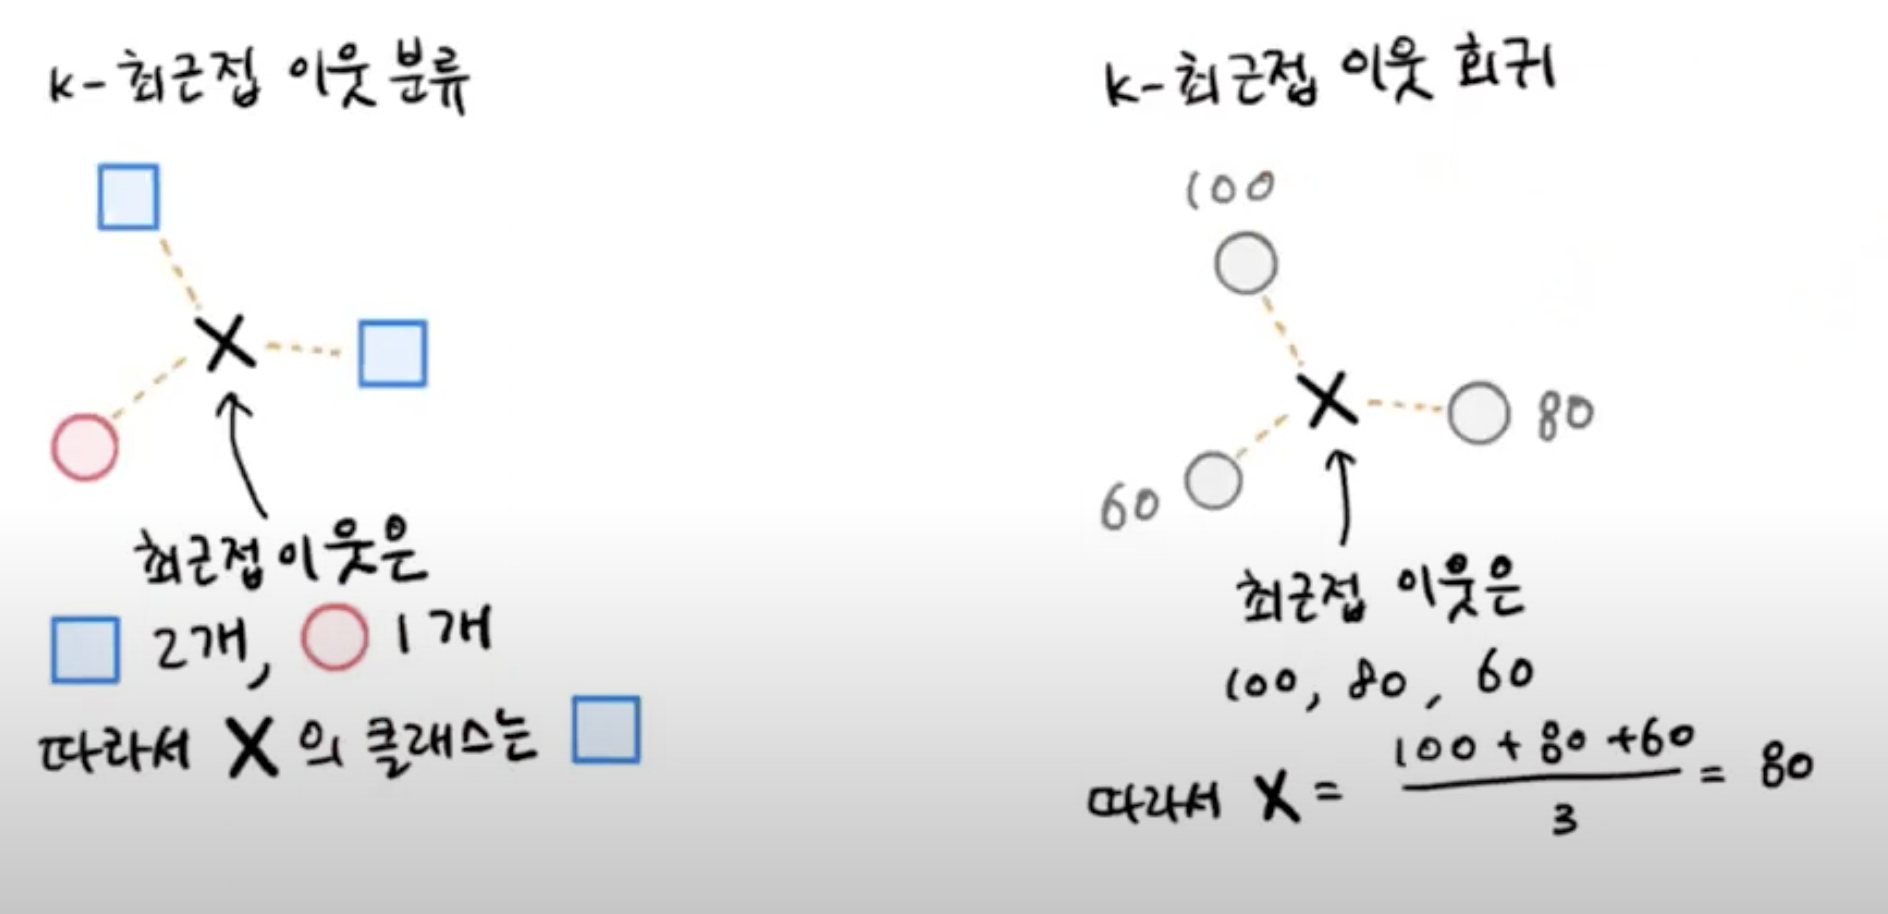

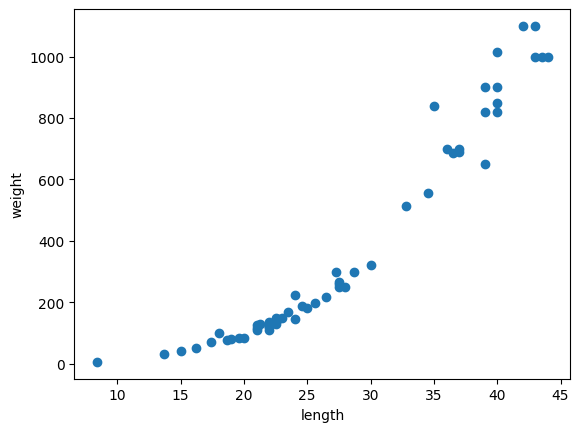

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

- 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다.
- perch_length, perch_weight는 1차원 배열

```
[1,2,3] 크기 (3, )
```

```
[[1],
[2],
[3]]
크기 (3, 1)
```
- numpy의 reshape() 함수 이용

In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
test_array = test_array.reshape(2,2)
print(test_array)
print(test_array.shape)

[[1 2]
 [3 4]]
(2, 2)


In [ ]:
test_array = test_array.reshape(3,3)

ValueError: ignored

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


* 분류에서는 테스트 세트에 있는 샘플을 정확하게 분류한 개수, 정확도
* 회귀에서는 결정계수(coefficient of determination), R^2(R스퀘어)
* 1 - (타깃 - 예측)제곱의 합 / (타깃 - 평균)제곱의 합
* 타깃의 평균 정도를 예측하는 수준이라면 0에 가까워짐
* 예측을 잘했다면 1에 가까워짐

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


* 과대 적합: 훈련 세트 점수가 더 높은 경우
* 과소 적합: 테스트 세트 점수가 더 높거나 두 점수 모두 낮은 경우

In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


* 농어의 높이, 길이 등의 수치로 무게를 예측해야함
* 이것은 분류가 아닌 회귀의 문제, k-최근접 이웃 회귀 모델을 만들었음
* k-최근접 이웃 회귀 모델은 분류와 동일하게 가장 가까운 k개의 이웃을 찾아 평균하여 샘플값 예측
* numpy reshape(): 배열의 크기를 바꾸는 메소드
* 사이킷런의 회귀 모델의 점수는 R^2, 정량적인 평가를 하고 싶으면 절대값 오차(mean_absolute_error)
* 일반적으로 훈련세트 점수가 테스트세트 점수보다 높음 (과대적합)
* 테스트세트 점수가 더 높거나 둘 다 낮으면 과소 적합
* 과대적합일 경우 모델을 덜 복잡하게 만들어야 한다 -> k 값을 늘린다.
* 과소적합일 경우 모델을 더 복잡하게 만들어야 한다 -> k 값을 줄인다.

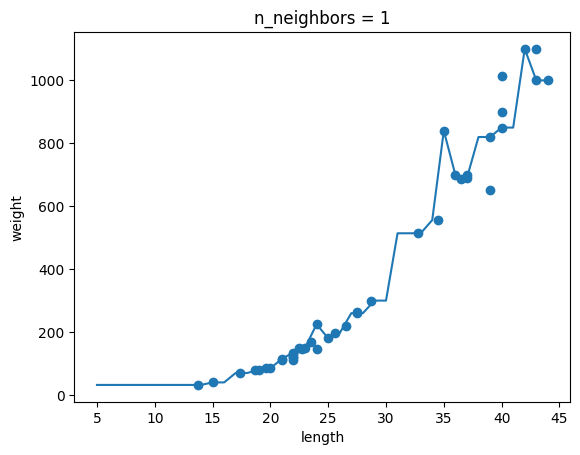

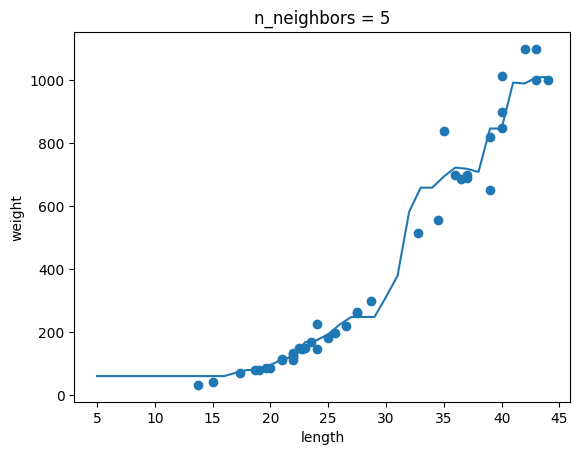

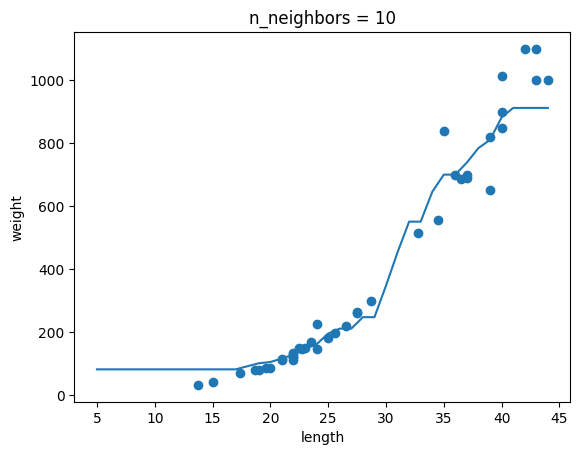

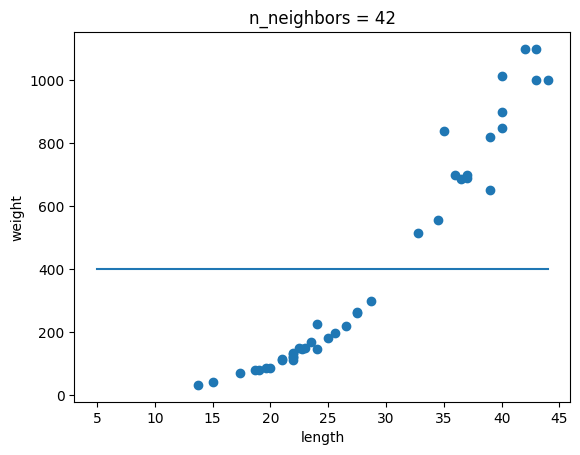

In [ ]:
knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10, 42]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

## 02-2 선형 회귀

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


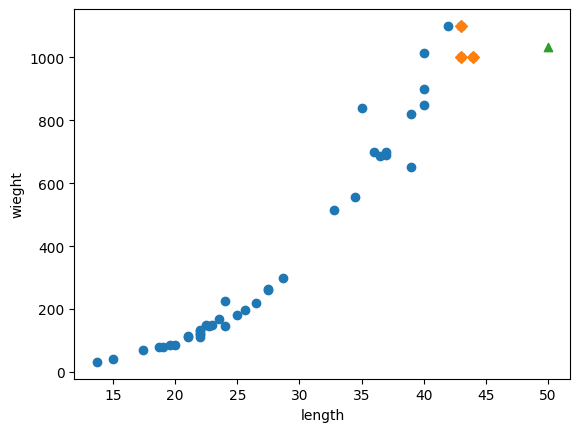

In [ ]:
import matplotlib.pyplot as plt

distance, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('wieght')
plt.show()

In [ ]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


* 선형 회귀(linear regression): 널리 사용되는 대표적인 회귀 알고리즘
* 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

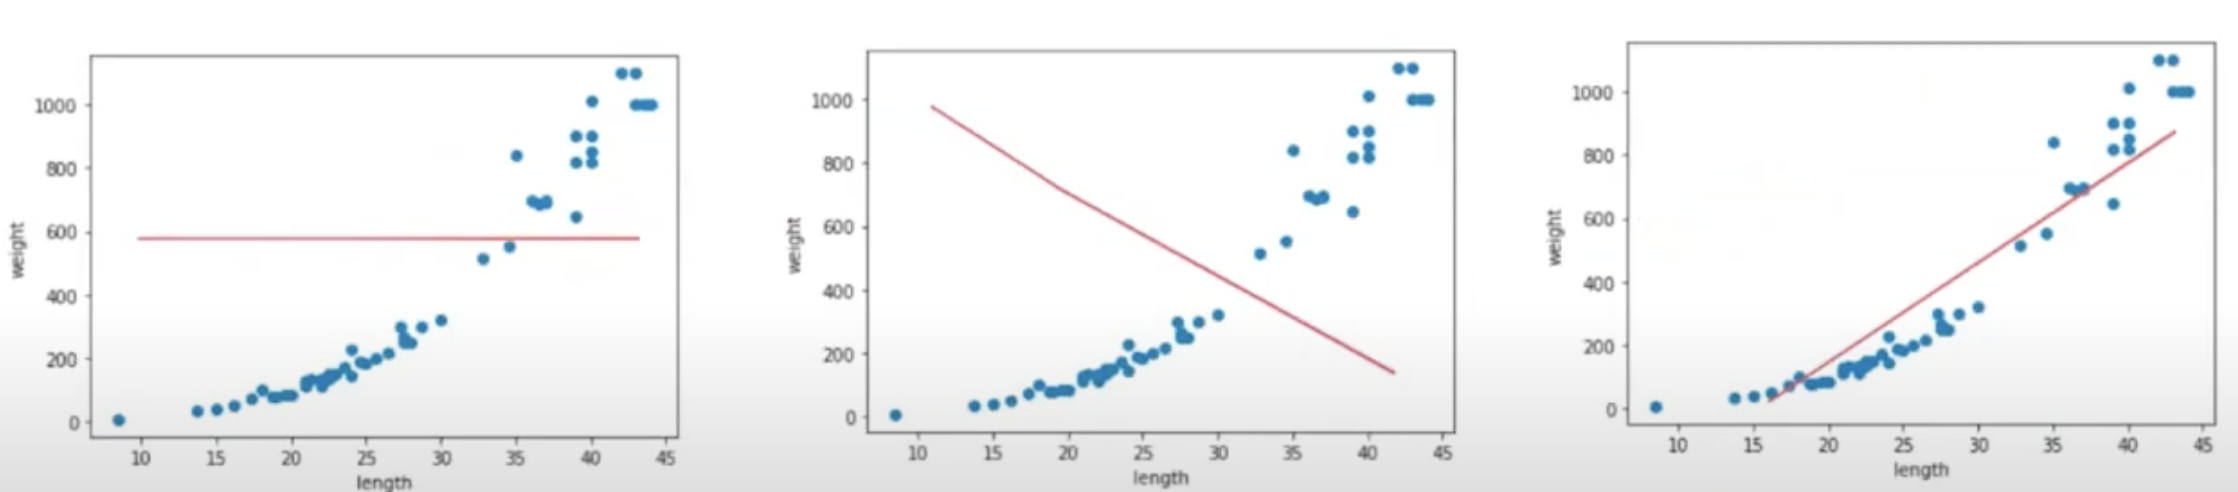

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


y = 39x - 709

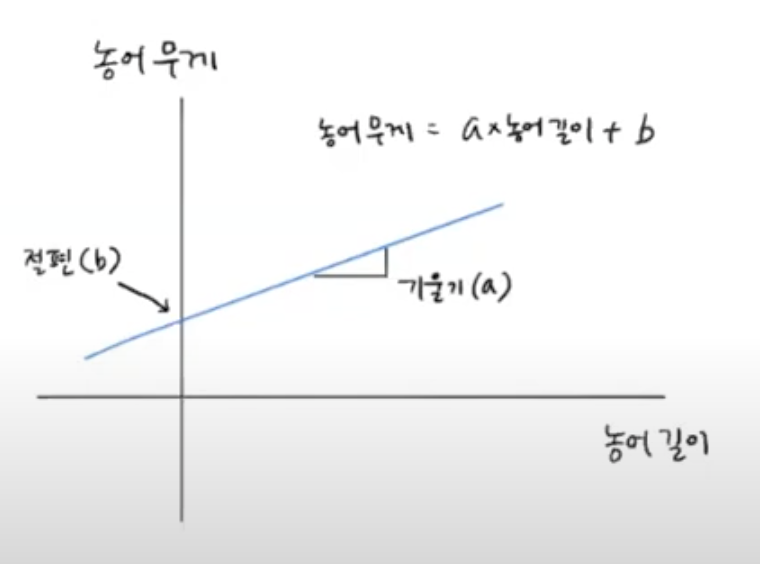

* coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터라고 부른다.
* 머신러닝의 훈련이 최적의 모델 파라미터를 찾는 것과 같다.
* 이를 모델 기반 학습이라고 한다.
* k-최근접 이웃에는 모델 파라미터가 없다, 훈련 세트를 저장하는 것이 훈련의 전부
* 이를 사례 기반 학습이라고 한다.

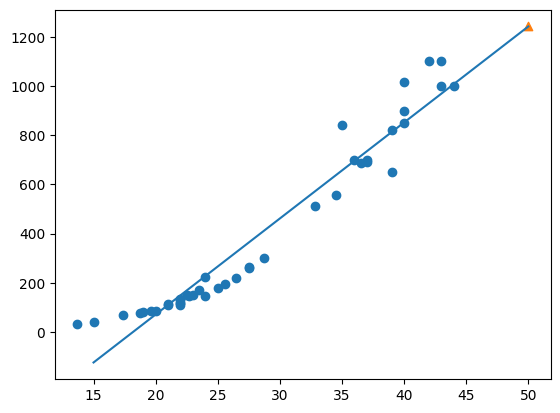

In [ ]:
plt.scatter(train_input, train_target)

plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


* 농어의 길이가 줄어들 때 무게가 0g 밑으로 내려 갈 수는 없다
* 다항식으로 만들어야 한다. (polynomial)
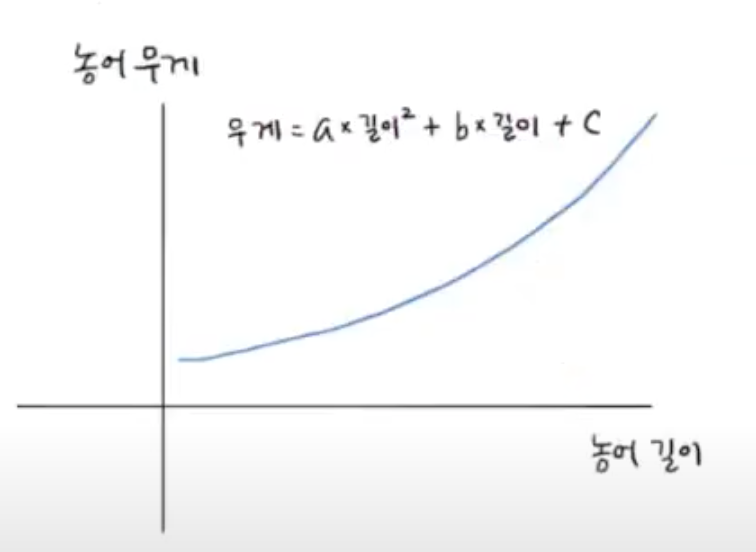

In [ ]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


y = 1x^2 -21x + 116

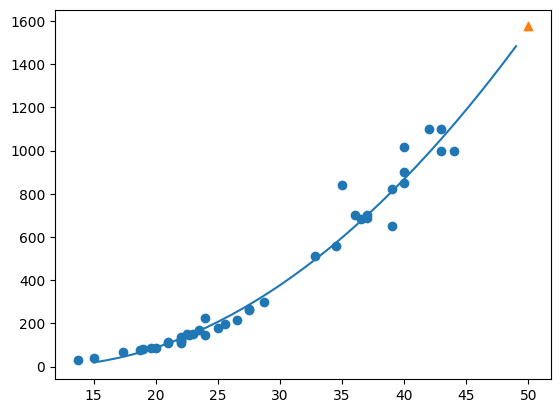

In [ ]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


* k-최근접 이웃 회귀를 사용해서 농어의 무게를 예측할 때 훈련 세트 범위 밖의 샘플을 예측할 수 없었다.
* 이를 해결하기 위해 선형 회귀를 사용, 훈련 세트에 맞는 직선의 방정식을 찾는 것
* 사이킷런의 LinearRegression 클래스 사용
* 가장 잘 맞는 직선의 방정식을 찾는다 = 기울기와 절편을 구한다는 말
* 하지만 모델이 단순하여 농어의 무게가 음수가 될 수도 있음
* 다항회귀를 사용
* 농어의 길이를 제곱하여 훈련세트에 추가한 후 다시 훈련
* 2차 방정식 그래프 형태를 학습
* 하지만 살짝 과소적합, 훈련 세트 성능보다 테스트 세트 성능이 좀 더 좋았음

## 02-3 특성 공학과 규제

* 다중 회귀: 여러 개의 특성을 사용한 선형회귀
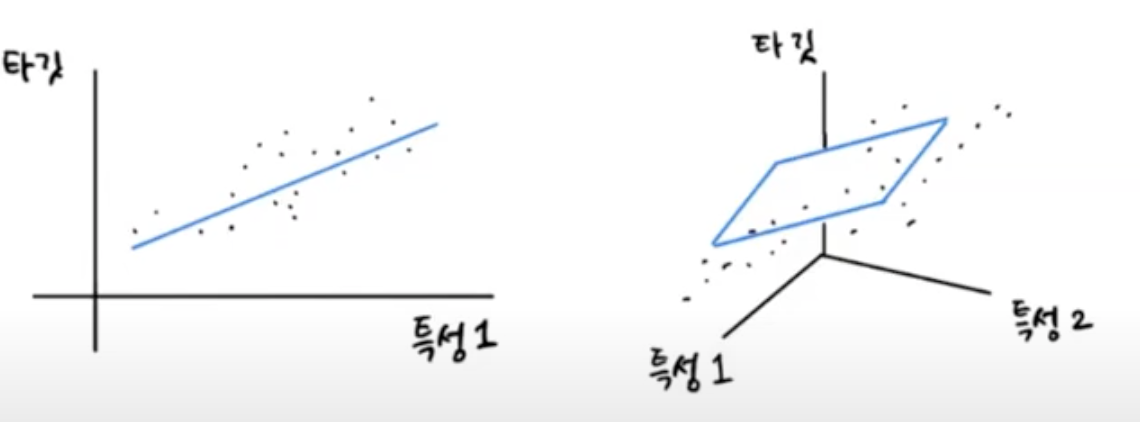

* 농어의 길이뿐만 아니라 높이와 두께 특성 추가
* 뿐만아니라 길이 x 높이, 길이 x 두께, 길이 제곱, 높이 제곱 ...
* 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업, 특성 공학

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

 * 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다.
 * 이런 클래스를 변환기(transformer)라고 함
 * 이때까지 했던 Classification, Regression은 추정기(estimator)
 * fit(), score(), predict() 메서드처럼 fit(), transform() 메서드를 제공

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
print(poly.get_feature_names_out())
test_poly = poly.transform(test_input)

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
(14, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


* 특성의 개수를 늘리면 선형 모델은 아주 강력해짐
* 훈련 세트에 대해 거의 완벽하게 학습하게 됨
* 하지만 너무 과대적합되므로 테스트 세트에서는 점수가 엄청 낮음
* 지난 시간에 배웠든 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수의 값도 차이가 나게됨
* 먼저 정규화가 필요, 평균과 표준편차를 구해서 표준점수, z점수를 구했음

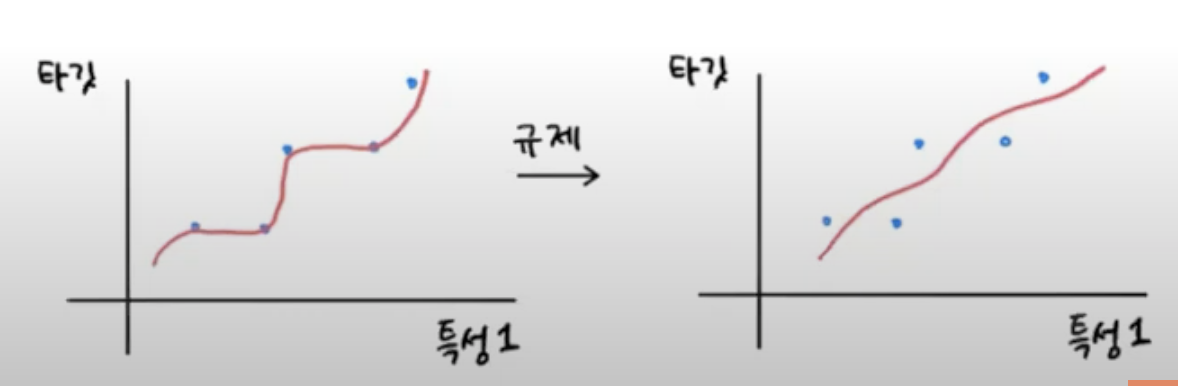

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

* 규제가 필요하다.
* 선형 회귀 모델에 규제를 추가한 모델이 릿지(ridge)와 라쏘(lasso)가 있음
* 릿지: 계수를 제곱한 값을 기준으로 규제
* 라쏘: 계수의 절대값을 기준으로 규제

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


* 릿지에는 알파 매개변수가 있음, Ridge(alpha=1)
* 알파 값이 크면 규제를 심하게, 작으면 규제를 적게 적용함
* 이렇게 사람이 알려줘야 하는 파라미터를 하이퍼파라미터라고 함

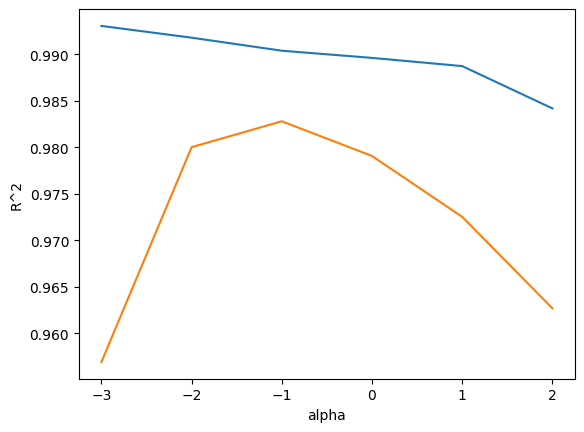

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

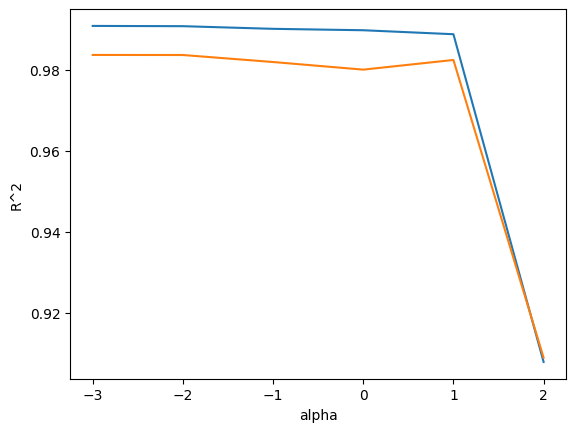

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))

40


* 라쏘 모델은 계수의 값을 아예 0으로 만들 수 도 있음
* 55개 특성 중에 사용한 특성은 15개밖에 되지 않음
* 이런 특징 때문에 라쏘 모델은 유용한 특성을 골라내는 용도로 사용할 수 있음